In [18]:
import numpy as np 
import pandas as pnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [15]:
df = pnd.read_csv('cs-training.csv')
data_testing = pnd.read_csv('cs-test.csv')
print(df)

        Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1                 1                              0.766127   
1                2                 0                              0.957151   
2                3                 0                              0.658180   
3                4                 0                              0.233810   
4                5                 0                              0.907239   
...            ...               ...                                   ...   
149995      149996                 0                              0.040674   
149996      149997                 0                              0.299745   
149997      149998                 0                              0.246044   
149998      149999                 0                              0.000000   
149999      150000                 0                              0.850283   

        age  NumberOfTime30-59DaysPastDueNotWorse    DebtRatio 

age
0        1
21     183
22     434
23     641
24     816
      ... 
102      3
103      3
105      1
107      1
109      2
Name: age, Length: 86, dtype: int64


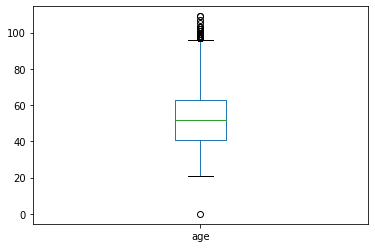

In [16]:
df['age'].plot.box()
print(df.groupby('age').age.count())

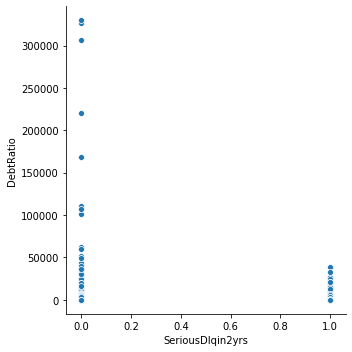

In [23]:
sns.relplot(x='SeriousDlqin2yrs', 
            y = 'DebtRatio',
            data=df)

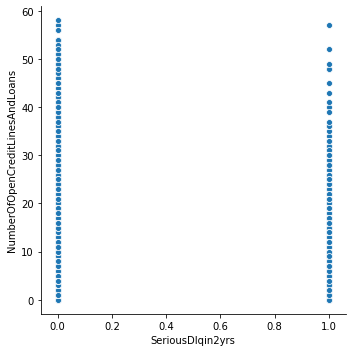

In [25]:
sns.relplot(x='SeriousDlqin2yrs', 
            y = 'NumberOfOpenCreditLinesAndLoans',
            data=df)

In [ ]:
df = df.drop(df[df['age'] == 0].index)

In [20]:
classifier = LogisticRegression()

In [18]:
y_train = df['SeriousDlqin2yrs']
x_train = df.iloc[:, 2:]
x_test = data_testing.iloc[:, 2:]
print(x_train)

        RevolvingUtilizationOfUnsecuredLines  age  \
0                                   0.766127   45   
1                                   0.957151   40   
2                                   0.658180   38   
3                                   0.233810   30   
4                                   0.907239   49   
...                                      ...  ...   
149995                              0.040674   74   
149996                              0.299745   44   
149997                              0.246044   58   
149998                              0.000000   30   
149999                              0.850283   64   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0                                          2     0.802982         9120.0   
1                                          0     0.121876         2600.0   
2                                          1     0.085113         3042.0   
3                                          0     0.036050  

In [36]:
average_monthly_income = df['MonthlyIncome'].mean()
print(average_monthly_income)
x_train = x_train.fillna(value = {'MonthlyIncome':average_monthly_income, 'NumberOfDependents': 0})
x_train.isnull().values.any()
print(x_train)

6670.221237392844
        RevolvingUtilizationOfUnsecuredLines  age  \
0                                   0.766127   45   
1                                   0.957151   40   
2                                   0.658180   38   
3                                   0.233810   30   
4                                   0.907239   49   
...                                      ...  ...   
149995                              0.040674   74   
149996                              0.299745   44   
149997                              0.246044   58   
149998                              0.000000   30   
149999                              0.850283   64   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0                                          2     0.802982         9120.0   
1                                          0     0.121876         2600.0   
2                                          1     0.085113         3042.0   
3                                        

In [44]:
classifier.fit(x_train, y_train)


c:\users\808648\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
average_monthly_income = data_testing['MonthlyIncome'].mean()
print(average_monthly_income)
x_test = x_test.fillna(value = {'MonthlyIncome':average_monthly_income, 'NumberOfDependents': 0})

print(x_test)


6855.0355896805895
        RevolvingUtilizationOfUnsecuredLines  age  \
0                                   0.885519   43   
1                                   0.463295   57   
2                                   0.043275   59   
3                                   0.280308   38   
4                                   1.000000   27   
...                                      ...  ...   
101498                              0.282653   24   
101499                              0.922156   36   
101500                              0.081596   70   
101501                              0.335457   56   
101502                              0.441842   29   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0                                          0     0.177513     5700.00000   
1                                          0     0.527237     9141.00000   
2                                          0     0.687648     5083.00000   
3                                       

In [64]:
x_test.isnull().values.any()

array([0, 1], dtype=int64)

In [69]:
y_test = classifier.predict_proba(x_test)
print(y_test)
y_test = y_test[:,1]
print(y_test)



[[0.93416809 0.06583191]
 [0.95337287 0.04662713]
 [0.95892267 0.04107733]
 ...
 [0.97802171 0.02197829]
 [0.97900659 0.02099341]
 [0.90263777 0.09736223]]
[0.06583191 0.04662713 0.04107733 ... 0.02197829 0.02099341 0.09736223]


In [75]:
df_test = pnd.DataFrame(y_test, columns=['Probability'], index= range(1, y_test.size + 1))
df_test.index.name = 'Id'
df_test.to_csv('cs-test-pred.csv')
    
